Task 1: Import packages and Load data

In [1]:
import pandas as pd
import os   #Operating System
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
filename = input('Please key in the filename: ')

In [2]:
path = '/Users/Admin/Downloads/python/Practice/Sales Reporting/'
df = pd.read_csv(path + 'sales2019_1.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Task 2: Clean and Preprocess data

Task 2.1: Merge 12-month data

In [3]:
#Tiếp nhận tham số là đường dẫn đến 1 thư mục và trả về dường dẫn là list các giá trị bên trong thư mục đó
filepaths = []
for file in os.listdir(path):
    if file.endswith('.csv'):   #Chỉ lấy file có đuôi csv
        filepath = path + file
        filepaths.append(filepath)
df1 = pd.read_csv(filepaths[1])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [4]:
#Concat dataframe lại với nhau
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):   #Chỉ lấy file có đuôi csv
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
#Kiểm tra tổng độ dài các hàng trong các tháng có bằng kết quả sau khi concat không?
sum(all_length)

186850

In [6]:
#Chuyển tệp vừa merge vào 1 file csv để đảm bảo dữ liệu tệp gốc
result.to_csv('anualSales2019.csv', index=False)
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Task 2.2: Add 'Month' column

In [7]:
#Tách tháng ra cột riêng để dễ xử lý
#Thử tự thao tác xem ?
df = pd.read_csv('anualSales2019.csv')
df['Order Date']    #Type: string

0         01/22/19 21:25
1         01/28/19 14:15
2         01/17/19 13:33
3         01/05/19 20:33
4         01/25/19 11:59
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186850, dtype: object

In [8]:
#slice substring from string
m = df['Order Date'].str.slice(0,2,1)  
#Create a series name month
df['Month'] = m
df['Month']
#Lấy ra unique value trong cột month đưa vào set
set(df['Month'])

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Or',
 nan}

Task 2.3: Get rid of 'NaN' and 'Or' value

In [9]:
#Have many ways to handle missing data. But here, we'll drop rows
df = df.dropna(how='all')

In [10]:
df = df[df['Month'] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


Task 3: Reporting

Task 3.1: What the best month for sales? How much was earned that month?

Why?
- Holiday season (Christmas, New Year,..)
- New launches (Q3)

In [155]:
#Kiểm tra CDL 2 cột Quantity Ordered và Price Each
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int32
float64


In [156]:
df['Sales'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer') * pd.to_numeric(df['Price Each'],downcast='float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.00,700.000000,1.548192e+09,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.950000,1.548685e+09,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.980000,1.547732e+09,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.990005,1.546720e+09,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.990000,1.548418e+09,"387 10th St, Austin, TX 73301",01,Austin,11


In [103]:
#move col 'Sales' near 'Order Date'
#Cut column out off Dataframe and put it to a variable
moving_col = df.pop('Sales')
#Insert it to Dataframes
df.insert(4,'Sales',moving_col)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [104]:
#Lọc dữ liệu theo tháng và tính sum 
sale_value = df.groupby('Month').sum()['Sales']

In [105]:
sale_value.max()

4613443.5

In [106]:
months = range(1,13)
list(months)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [107]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

<BarContainer object of 12 artists>

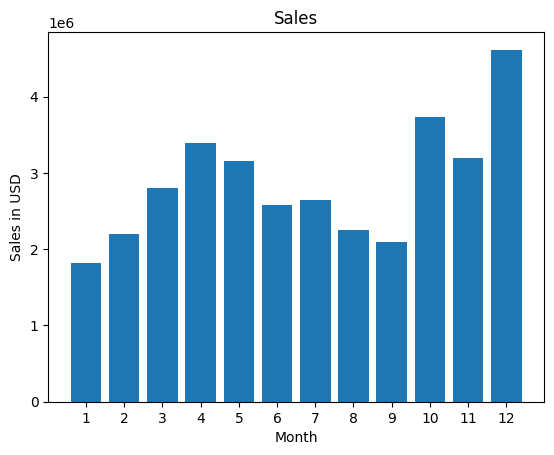

In [108]:
plt.title('Sales')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.bar(months,sale_value)

Task 3.2: What city has the best sales?

Why?
- Silicon Valley base in San Fransico
- The density of engineer located in SF

In [109]:
#Split address
address = df['Purchase Address'].str.split(',')
c = []
for city in address:
    c.append(city[1])

#Create a series name City
df['City'] = c

In [110]:
#Lọc dữ liệu theo city và tính sum 
sale_value_city = df.groupby('City').sum()['Sales']
sale_value_city

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [111]:
#Create a list of city
cities = df['City'].unique()
cities
#Vấn đề: list tên city không khớp với list số liệu => Lệch lạc

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

In [112]:
#Tạo list city theo cách khác lấy từ sale_value_city
cities = []
for city,sales in sale_value_city.items():
    cities.append(city)

cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

<BarContainer object of 9 artists>

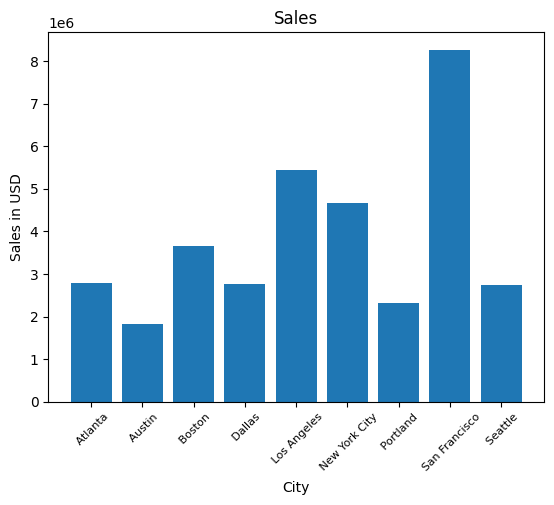

In [113]:
plt.title('Sales')
plt.xticks(rotation=45, size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.bar(cities,sale_value_city)


Task 3.3: What time should we display ads to maximize the liklihood of customer's buying product?

In [114]:
#Chuyển cột 'Order Date' từ string sang datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9368\4281927129.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [115]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [116]:
#Chiết xuất hour from Order Date
df['Hour'] = df['Order Date'].dt.hour

In [117]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [118]:
#Chuyển cột Order Date từ Datetime về Float để tính sum()
df['Order Date'] = pd.to_datetime(df['Order Date']).astype('int64')/ 10**9
print(df['Hour'].dtypes)
print(df['Order Date'].dtypes)

int32
float64


In [119]:
sales_value_hours = df.groupby('Hour').sum()['Sales']
sales_value_hours 

Hour
0     7.137212e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Sales, dtype: float32

In [120]:
hours = [hour for hour,sales in sales_value_hours.items()]

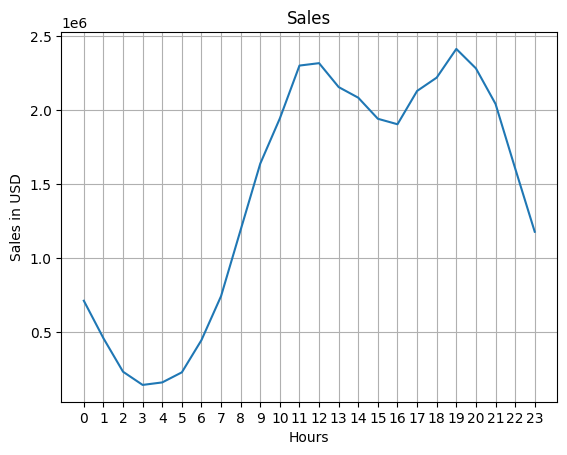

In [121]:
plt.title('Sales')
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.plot(hours,sales_value_hours)

Đếm số đơn hàng trong khung giờ nào là cao nhất sẽ phù hợp với câu hỏi số 3 hơn

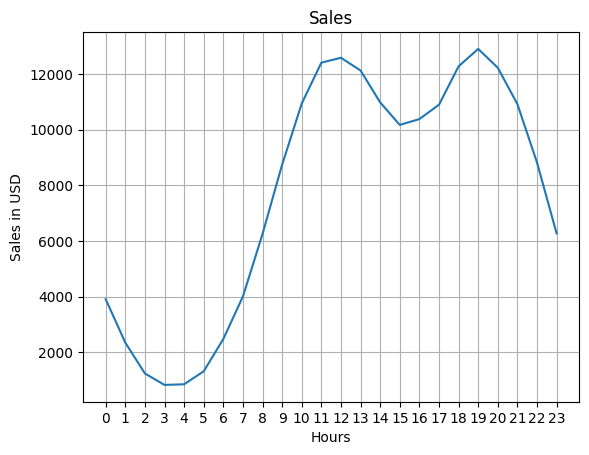

In [122]:
sales_value_hours = df.groupby('Hour').count()['Sales']
hours = [hour for hour,sales in sales_value_hours.items()]
plt.title('Sales')
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.plot(hours,sales_value_hours)
#Biểu đồ dường như không đổi

Có thể thấy khung giờ cao nhất là giờ nghỉ trưa (11-1213h) và buổi tối chill chill 18-19-20h => Chạy qc trước đó 30-60p là ok

Task 3.4: What products are most often sold together?

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700,700.000000,1.548192e+09,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.950000,1.548685e+09,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.980000,1.547732e+09,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.990005,1.546720e+09,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.990000,1.548418e+09,"387 10th St, Austin, TX 73301",01,Austin,11


In [124]:
#Find duplicate rows 
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,1.546877e+09,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,1.546877e+09,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150,150.00,1.546418e+09,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,1.546418e+09,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400,400.00,1.547119e+09,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [125]:
groupProduct = lambda product: ', '.join(product)

In [126]:
#combine multiple rows into one rows
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9368\1890083442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,1.546877e+09,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,1.546877e+09,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150,150.00,1.546418e+09,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,1.546418e+09,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400,400.00,1.547119e+09,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [127]:
#drop duplicate rows
df_dup = df_dup[['Order ID','All Products']].drop_duplicates()
df_dup

,Order ID,All Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [128]:
#Count number of values in column
df_dup['All Products'].value_counts().head(10)
#Trả về cặp product hay dc bán cùng nhau theo giá trị giảm dần

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

Task 3.5: What product sold the most? Why do you think it sold the most?

In [157]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')

In [158]:
product_orderd_value = df.groupby('Product').sum()['Quantity Ordered']
product = [product for product,value in product_orderd_value.items()]
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [159]:
product_orderd_value

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

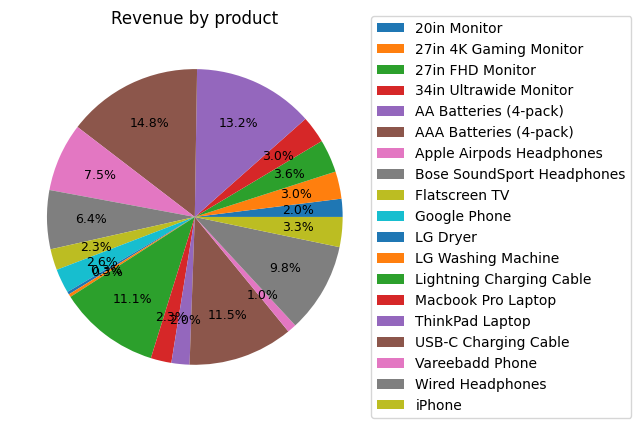

In [132]:
plt.title('Revenue by product')
plt.pie(product_orderd_value,autopct='%1.1f%%',textprops={'fontsize': 9}, pctdistance=0.7,radius=1)
plt.legend(product,loc='right',bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

<BarContainer object of 19 artists>

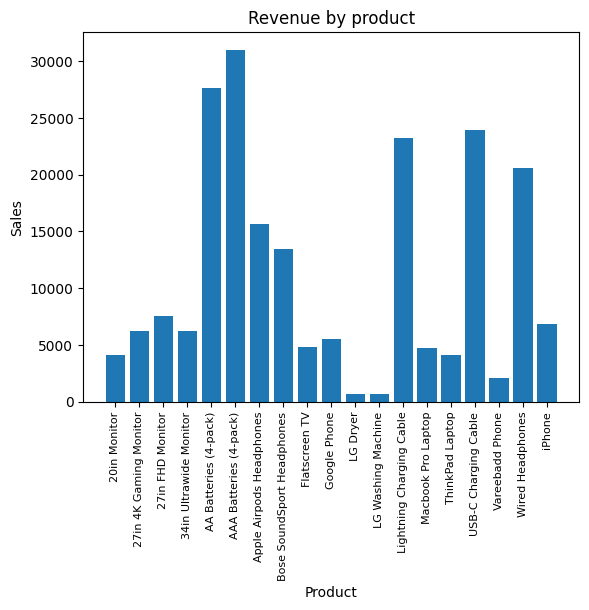

In [133]:
plt.title('Revenue by product')
plt.xticks(rotation=90,size=8)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.bar(product,product_orderd_value)

In [221]:
df['Price Each'] = df['Price Each'].astype('float')
df['Price Each']

0         700.0
1          14.0
2          11.0
3         149.0
4          11.0
          ...  
186845      2.0
186846    700.0
186847    700.0
186848    379.0
186849     11.0
Name: Price Each, Length: 185950, dtype: float64

In [222]:
group = df.groupby('Product')
prices = group['Price Each'].mean()
prices

Product
20in Monitor                   109.0
27in 4K Gaming Monitor         389.0
27in FHD Monitor               149.0
34in Ultrawide Monitor         379.0
AA Batteries (4-pack)            3.0
AAA Batteries (4-pack)           2.0
Apple Airpods Headphones       150.0
Bose SoundSport Headphones      99.0
Flatscreen TV                  300.0
Google Phone                   600.0
LG Dryer                       600.0
LG Washing Machine             600.0
Lightning Charging Cable        14.0
Macbook Pro Laptop            1700.0
ThinkPad Laptop                999.0
USB-C Charging Cable            11.0
Vareebadd Phone                400.0
Wired Headphones                11.0
iPhone                         700.0
Name: Price Each, dtype: float64

#Phân tích vì sao AAA Bateries bán chạy nhất?
=> Price, Brand, Quality
=> Kiểm tra yếu tố Price ảnh hưởng đến doanh thủ sản phẩm

C:\Users\Admin\AppData\Local\Temp\ipykernel_9368\3316636742.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product,rotation=90,size=8)


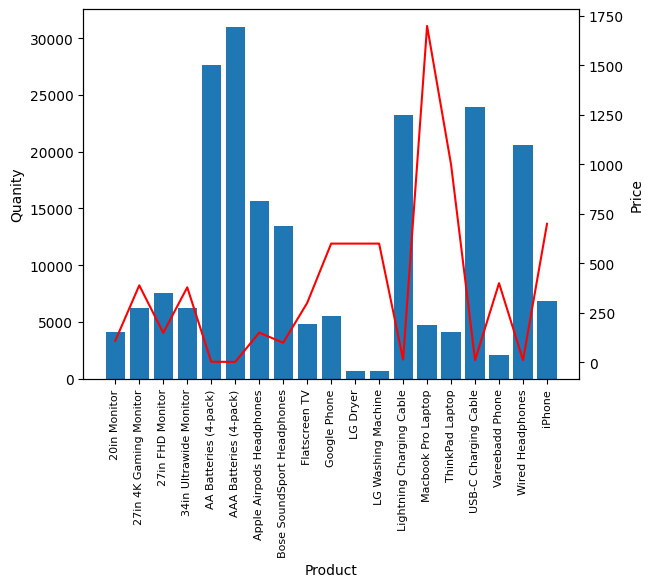

In [227]:
x = product
y1 = product_orderd_value
y2 = prices

fig, ax1 = plt.subplots()   #Tạo subplot

ax2 = ax1.twinx()
ax1.bar(x,y1)
ax2.plot(x,y2,color='r')

ax1.set_xticklabels(product,rotation=90,size=8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quanity')
ax2.set_ylabel('Price')


plt.show()


#Giá AA,AAA thấp => bán được nhiều